In [1]:
# Modues to be used
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import tensorflow as tf

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder


# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior() 

In [2]:
# Load data from pickle files

# -> Player dictionary with the dataFrames
f = open('data/dict_player.pickle', 'rb')
dict_player = pickle.load(f)

# -> Map dataFrames
f = open('data/df_map.pickle','rb')
df_map = pickle.load(f)

# -> Map dictionary
f = open('data/dict_map.pickle','rb')
dict_map = pickle.load(f)

In [3]:
df_map

,map_id,map,date,event_id,event_name,team_id_1,team_name_1,team_score_1,team_kills_1,team_deaths_1,team_assists_1,team_rank_1,team_id_2,team_name_2,team_score_2,team_kills_2,team_deaths_2,team_assists_2,team_rank_2,winner
12838,12838,NaN,2012-09-13 19:00:00,965,Go4CS:GO Cup #6,4411,NiP,16,91.0,46.0,0.0,0,4443,PRiME,3,45.0,91.0,0.0,0,1
12839,12839,NaN,2012-09-13 19:00:00,965,Go4CS:GO Cup #6,4411,NiP,16,83.0,34.0,0.0,0,4443,PRiME,1,34.0,83.0,0.0,0,1
12840,12840,NaN,2012-09-13 19:00:00,966,CyberGamer Qualifier Cup #1 by Tt eSPORTS,4444,Blight,16,81.0,37.0,0.0,0,4445,FMESPORTS,2,37.0,81.0,0.0,0,1
12841,12841,NaN,2012-09-13 19:00:00,966,CyberGamer Qualifier Cup #1 by Tt eSPORTS,4444,Blight,16,97.0,58.0,0.0,0,4445,FMESPORTS,7,57.0,97.0,0.0,0,1
12848,12848,NaN,2012-09-23 12:00:00,973,DreamHack Valencia 2012,4411,NiP,16,102.0,86.0,0.0,0,4467,VeryGames,10,86.0,102.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97591,97591,trn,2020-01-10 00:35:00,5104,IEM Katowice 2020 North America Closed Qualifier,5752,Cloud9,13,90.0,105.0,12.0,18,9215,MIBR,16,105.0,90.0,20.0,14,2
97592,97592,nuke,2020-01-10 01:00:00,5164,Aorus League 2019 #4 Northern Cone,10330,Supremacy,16,98.0,69.0,17.0,0,10578,Infamous,8,69.0,98.0,13.0,0,1
97593,97593,ovp,2020-01-10 00:35:00,5104,IEM Katowice 2020 North America Closed Qualifier,5752,Cloud9,16,77.0,46.0,11.0,18,9215,MIBR,4,46.0,77.0,10.0,14,1
97594,97594,inf,2020-01-10 01:00:00,5164,Aorus League 2019 #4 Northern Cone,10330,Supremacy,16,99.0,93.0,16.0,0,10578,Infamous,12,93.0,100.0,17.0,0,1


In [5]:
dict_player[8797][dict_player[8797]['date']>datetime(2018,1,1)]

,map,date,team_id,team_name,player_id,player_name,kills,hs_kills,assists,flash_assists,...,first_kills_diff,rating,kills_per_round,deaths_per_round,impact,team_score,op_score,win,team_rank,prize
map_id,,,,,,,,,,,,,,,,,,,,,
59738,cch,2018-01-12 23:25:00,5752,Cloud9,8797,Stewie2K,20,9,6,2,...,2,1.22,0.74,0.48,0.95,16,11,1,5,0.000000
59786,inf,2018-01-13 20:00:00,5752,Cloud9,8797,Stewie2K,23,14,4,2,...,3,1.79,1.10,0.43,2.16,16,5,1,5,0.000000
59819,trn,2018-01-14 22:35:00,5752,Cloud9,8797,Stewie2K,17,7,5,2,...,-1,1.20,0.81,0.67,0.78,16,5,1,5,0.000000
59934,cch,2018-01-19 20:15:00,5752,Cloud9,8797,Stewie2K,13,7,5,1,...,-3,0.86,0.54,0.75,0.91,8,16,0,6,0.000000
59964,cbl,2018-01-20 15:50:00,5752,Cloud9,8797,Stewie2K,12,4,5,0,...,-5,0.67,0.41,0.83,0.66,13,16,0,6,0.000000
60001,mrg,2018-01-21 21:35:00,5752,Cloud9,8797,Stewie2K,26,10,2,0,...,2,1.63,1.13,0.61,1.69,16,7,1,6,0.000000
60017,trn,2018-01-22 16:40:00,5752,Cloud9,8797,Stewie2K,19,10,2,0,...,0,1.26,0.86,0.59,1.48,16,6,1,6,0.000000
60031,mrg,2018-01-22 23:15:00,5752,Cloud9,8797,Stewie2K,22,9,1,0,...,4,1.75,1.10,0.50,2.05,16,4,1,6,0.000000
60174,ovp,2018-01-26 20:55:00,5752,Cloud9,8797,Stewie2K,20,8,4,0,...,1,1.20,0.87,0.70,1.40,16,7,1,6,0.000000


In [192]:
dict_player[7592].tail(n=50).columns

Index(['map', 'date', 'team_id', 'team_name', 'player_id', 'player_name',
       'kills', 'hs_kills', 'assists', 'flash_assists', 'deaths', 'KAST',
       'kill_death_diff', 'ADR', 'first_kills_diff', 'rating',
       'kills_per_round', 'deaths_per_round', 'impact', 'team_score',
       'op_score', 'win', 'team_rank', 'prize'],
      dtype='object')

In [304]:
df_map['map'].unique()

array([nan, 'cch', '-', 'd2', 'mrg', 'inf', 'nuke', 'trn', 'ovp', 'cbl',
       'tcn', 'vertigo'], dtype=object)

In [37]:
map_name = 'trn'

DAYS_WEIGHT = 365

time_1 = datetime.now()

# df_tmp = df_map[ (df_map['date']>datetime(2019,1,1)) & ( (df_map['team_rank_1']<30) | (df_map['team_rank_2']<30) ) & ( (df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) )]

#df_tmp = df_map[ (df_map['date']>datetime(2018,1,1)) & ( (df_map['team_rank_1']<30) | (df_map['team_rank_2']<30) ) & ( (df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) )]


# df_tmp = df_map[ (df_map['map']==map_name) &
#     (df_map['date']>datetime(2019,1,1)) & ( (df_map['team_rank_1']<20) & (df_map['team_rank_2']<20) ) & ( (df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) )]

df_tmp = df_map[ (df_map['map']==map_name) & (df_map['date']>datetime(2019,1,1)) &
    ( (df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) ) ]


dict_train = {}

print( len( df_tmp['map_id']) )

for map_id in df_tmp['map_id'][:50]:

    map_date = df_tmp.loc[map_id]['date']

    dict_train[map_id] = {}    

    # Here we are taking the rankings to be non-zero
    rank_1 = df_tmp.loc[map_id]['team_rank_1']
    rank_2 = df_tmp.loc[map_id]['team_rank_2']

    winner = df_tmp.loc[map_id]['winner']

    if rank_1 < rank_2:
        fav = 0
        dict_train[map_id]['rank_dif'] = rank_2-rank_1

        if winner == 1:
            dict_train[map_id]['fav_win'] = 1
        else:
            dict_train[map_id]['fav_win'] = 0

    else:
        fav = 1
        dict_train[map_id]['rank_dif'] = rank_1-rank_2

        if winner == 2:
            dict_train[map_id]['fav_win'] = 1
        else:
            dict_train[map_id]['fav_win'] = 0

    count_team = -1
    for team_id in dict_map[map_id]:

        count_team = count_team + 1

        weighted_rating    = []
        weighted_kast      = []
        weighted_kpr       = []
        weighted_round_dif = []

        # prize = []

        for player_id in dict_map[map_id][team_id]['players_id']:            

            df_aux = dict_player[player_id][ dict_player[player_id]['map']==map_name ]

            date_vec = (map_date-df_aux['date']).astype('timedelta64[D]')

            # date_vec = (map_date-dict_player[player_id]['date']).astype('timedelta64[D]')

            # df_op_rank = df_tmp[ df_tmp['team_rank_1'] ]

            # df_aux = dict_player[player_id][ (date_vec>1) & (date_vec<DAYS_WEIGHT)  ]

            #df_aux = dict_player[player_id][ (date_vec>1) & (date_vec<DAYS_WEIGHT) ]

            # df_aux = df_aux[ df_aux['map']==map_name ]

            df_aux = df_aux[ (date_vec>1) & (date_vec<DAYS_WEIGHT) ]

            try:
                m = float(1.0)/ sum( date_vec[(date_vec>1) & (date_vec<DAYS_WEIGHT)]-DAYS_WEIGHT )
            except:
                m = 0.0

            w_i = m * (date_vec[(date_vec>1) & (date_vec<DAYS_WEIGHT)] - DAYS_WEIGHT)
            
            weighted_rating.append( sum(df_aux['rating'] * w_i) )
            weighted_kast.append( sum(df_aux['KAST'] * w_i / 100.0) )
            weighted_kpr.append( sum(df_aux['kills_per_round'] * w_i) )
            

            weighted_round_dif.append( sum( (df_aux['team_score']-df_aux['op_score']) * w_i) )

            # prize.append( sum(dict_player[player_id][  ['prize'] ) )

        order = np.argsort( weighted_rating )

        # if count_team == fav:
        #     count_p = -1
        #     for ind in order:
        #         count_p = count_p + 1
        #         dict_train[map_id]['t_0_p_'+str(count_p)+'_rating'] = weighted_rating[ind]
        #         dict_train[map_id]['t_0_p_'+str(count_p)+'_kast'] = weighted_rating[ind]
        #         dict_train[map_id]['t_0_p_'+str(count_p)+'_kpr'] = weighted_rating[ind]
        # else:
        #     count_p = -1
        #     for ind in order:
        #         count_p = count_p + 1
        #         dict_train[map_id]['t_1_p_'+str(count_p)+'_rating'] = weighted_rating[ind]
        #         dict_train[map_id]['t_1_p_'+str(count_p)+'_kast'] = weighted_rating[ind]
        #         dict_train[map_id]['t_1_p_'+str(count_p)+'_kpr'] = weighted_rating[ind]

        if count_team == fav:

            dict_train[map_id]['t_0_avg_rating'] = np.average( weighted_rating )
            dict_train[map_id]['t_0_std_rating'] = np.std( weighted_rating )

            dict_train[map_id]['t_0_avg_kast'] = np.average( weighted_kast )
            dict_train[map_id]['t_0_std_kast'] = np.std( weighted_kast )

            dict_train[map_id]['t_0_avg_kpr'] = np.average( weighted_kpr )
            dict_train[map_id]['t_0_std_kpr'] = np.std( weighted_kpr )

            dict_train[map_id]['t_0_avg_rd'] = np.average( weighted_round_dif )
            dict_train[map_id]['t_0_std_rd'] = np.std( weighted_round_dif )

        else:
            
            dict_train[map_id]['t_1_avg_rating'] = np.average( weighted_rating )
            dict_train[map_id]['t_1_std_rating'] = np.std( weighted_rating )

            dict_train[map_id]['t_1_avg_kast'] = np.average( weighted_kast )
            dict_train[map_id]['t_1_std_kast'] = np.std( weighted_kast )

            dict_train[map_id]['t_1_avg_kpr'] = np.average( weighted_kpr )
            dict_train[map_id]['t_1_std_kpr'] = np.std( weighted_kpr )

            dict_train[map_id]['t_1_avg_rd'] = np.average( weighted_round_dif )
            dict_train[map_id]['t_1_std_rd'] = np.std( weighted_round_dif )

    

time_2 = datetime.now()

print( time_2-time_1 )
#date_vec

1389
0:00:37.806160


<Figure size 720x576 with 0 Axes>

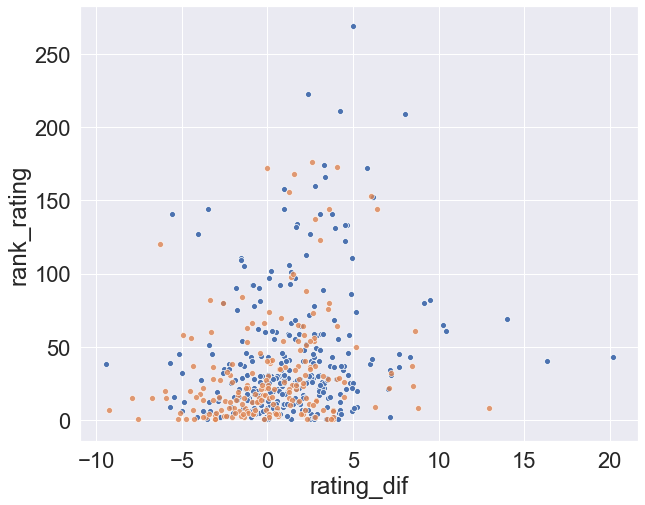

In [42]:
dict_train
df_train = pd.DataFrame.from_dict(dict_train,orient='index')

df_train = df_train.fillna(0)

for map_id in df_train.index:
    #df_train.at[map_id,'rank_rating'] = np.log(df_train.at[map_id,'rank_dif']+1)
    df_train.at[map_id,'rank_rating'] = df_train.at[map_id,'rank_dif']

    # df_train.at[map_id,'rating_dif'] = 1.0*(dict_train[map_id]['t_0_avg_rating'] - dict_train[map_id]['t_1_avg_rating'])**1
    df_train.at[map_id,'rating_dif'] = 1.0*(dict_train[map_id]['t_0_avg_rd'] - dict_train[map_id]['t_1_avg_rd'])**1
    df_train.at[map_id,'kast_dif'] = 1.0*(dict_train[map_id]['t_0_avg_kast'] - dict_train[map_id]['t_1_avg_kast'])**1
    #df_train.at[map_id,'rank_rating'] = df_train.at[map_id,'t_1_avg_rating'] / df_train.at[map_id,'rank_dif']

df_train = df_train.iloc[:,[-1,-2,-3,-20]]


#df_aux.tail()

#len(df_train.rank_rating.unique())

# len(df_train)
#df_aux


sns.set_style("whitegrid")
sns.set(font_scale=2)
#sns.set_palette("pastel")

plt.figure(figsize=(10,8))
# ax1 = sns.scatterplot(data=data_tmp,x='win',y='ADR')

df_upsets = df_train[df_train['fav_win']==1]
df_no_upsets = df_train[df_train['fav_win']==0]
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_upsets,x='rating_dif',y='rank_rating',alpha=1)
sns.scatterplot(data=df_no_upsets,x='rating_dif',y='rank_rating',alpha=0.8)


In [33]:
df_train[df_train['fav_win']==1].head(n=50)


,kast_dif,rating_dif,rank_rating,fav_win
79962,17.676205,13.155655,40.0,1
79987,-62.910077,-22.223674,7.0,1
80004,97.269634,13.694188,26.0,1
80020,46.868347,16.556735,5.0,1
80086,-18.946685,-5.815700,45.0,1
80096,-244.283162,-122.287785,127.0,1
80124,12.017464,8.379653,4.0,1
80194,14.117860,6.526360,37.0,1
80217,245.497109,-46.683069,25.0,1
80230,-31.150460,-9.224195,80.0,1


In [34]:
df_train[df_train['fav_win']==0].head(n=50)

,kast_dif,rating_dif,rank_rating,fav_win
80026,41.926131,8.067033,65.0,0
80057,-21.913796,-6.630229,15.0,0
80059,-4532.466447,-238.077715,66.0,0
80066,-68.509518,-83.756776,98.0,0
80128,54.522892,33.403127,137.0,0
80149,-17.486462,-6.948334,1.0,0
80156,18.840500,8.228507,26.0,0
80161,21.406453,22.242222,176.0,0
80174,-31.125889,-9.228711,80.0,0
80189,60.112150,102.758295,36.0,0


In [524]:
df_train['fav_win'].mean()

0.6184305255579554

In [534]:
# Divide data set into training and testing sets
# -> We use 75% of the data for training and 25% for testing
#X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['fav_win','rank_dif'],axis=1),df_train['fav_win'], test_size=0.25)

#X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['fav_win','rank_dif'],axis=1),df_train['fav_win'], test_size=0.3)

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['fav_win','rank_dif'],axis=1),df_train['fav_win'], test_size=0.25)

#X_train, X_test, y_train, y_test = train_test_split(x_orig,y_orig, test_size=0.25)

# Make an instance of the model, and increase the maximum number of iterations to avoid convergence problems
logmodel = LogisticRegression(max_iter=800)



# Training for the model
logmodel.fit(X_train,y_train)

# Now we use the testing data set to make predictions and evaluate the model's performance
predictions = logmodel.predict(X_test)

print('>'+classification_report(y_test,predictions,target_names=['Underdog wins','Favorite wins']))

#predictions[:] = 1

#c_mat = confusion_matrix(y_test.values, predictions)
c_mat = confusion_matrix(y_test, predictions)
print( c_mat )

accuracy = (c_mat[0][0] + c_mat[1][1]) / np.sum(c_mat)
print(accuracy)


>               precision    recall  f1-score   support

Underdog wins       0.45      0.04      0.07       134
Favorite wins       0.62      0.97      0.75       214

     accuracy                           0.61       348
    macro avg       0.54      0.50      0.41       348
 weighted avg       0.55      0.61      0.49       348

[[  5 129]
 [  6 208]]
0.6120689655172413


In [507]:
logmodel.coef_

array([[ 3.07429280e-01,  1.96384515e-01, -9.59412318e-02,
         1.81165361e-01, -8.93690841e-02,  3.57583737e-02,
        -1.31775762e-01, -1.41138350e-01, -7.87198392e-02,
         1.01731372e-01, -6.61004774e-02,  1.56889076e-01,
        -4.86296248e-02, -1.13413138e-02,  2.55937648e-05]])

In [172]:
# Source:
# https://www.geeksforgeeks.org/ml-logistic-regression-using-tensorflow/

#df_aux = df_train.drop(['rank_dif'],axis=1)
df_aux = df_train
# Feature Matrix 
#x_orig = np.column_stack( (df_aux.iloc[:, -17:-16].values, df_aux.iloc[:, -9:-8]) )
#x_orig = df_aux.iloc[:, -17:].values

x_orig = df_aux.iloc[:, -16:-15].values

#x_orig = df_aux.iloc[:, -1:].values

print(x_orig)
#, df_aux.iloc[:, -9:-8].values]
  
# Data labels 
y_orig = df_aux.iloc[:, -18:-17].values 
  
print("Shape of Feature Matrix:", x_orig.shape) 
print("Shape Label Vector:", y_orig.shape) 

print(x_orig)

# Positive Data Points 
x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([x_orig[i] for i in range(len(x_orig)) 
                                    if y_orig[i] == 0]) 
  
# # Plotting the Positive Data Points 
# plt.scatter(x_pos[:, 0], x_pos[:, 15], color = 'blue', label = 'Positive') 
  
# # Plotting the Negative Data Points 
# plt.scatter(x_neg[:, 0], x_neg[:, 15], color = 'red', label = 'Negative') 
  
# plt.xlabel('Feature 1') 
# plt.ylabel('Feature 2') 
# plt.title('Plot of given data') 
# plt.legend() 
  
# plt.show() 
# # Positive Data Points 
# x_pos = np.array([x_orig[i] for i in range(len(x_orig)) 
#                                     if y_orig[i] == 1]) 
  
# # Negative Data Points 
# x_neg = np.array([x_orig[i] for i in range(len(x_orig)) 
#                                     if y_orig[i] == 0]) 

[[0.0746851 ]
 [0.02581955]
 [0.11029708]
 ...
 [0.02276871]
 [0.02276871]
 [0.02276871]]
Shape of Feature Matrix: (4177, 1)
Shape Label Vector: (4177, 1)
[[0.0746851 ]
 [0.02581955]
 [0.11029708]
 ...
 [0.02276871]
 [0.02276871]
 [0.02276871]]


In [97]:
# Creating the One Hot Encoder 
oneHot = OneHotEncoder() 
  
# Encoding x_orig 
oneHot.fit(x_orig) 
x = oneHot.transform(x_orig).toarray() 
  
#x = x_orig

# Encoding y_orig 
oneHot.fit(y_orig) 
y = oneHot.transform(y_orig).toarray() 

#y = y_orig  

#alpha, epochs = 0.0035, 500
alpha, epochs = 0.0035, 500
m, n = x.shape 
print('m =', m) 
print('n =', n) 
print('Learning Rate =', alpha) 
print('Number of Epochs =', epochs) 




# There are n columns in the feature matrix 
# after One Hot Encoding. 
X = tf.placeholder(tf.float32, [None, n]) 
  
# Since this is a binary classification problem, 
# Y can take only 2 values. 
Y = tf.placeholder(tf.float32, [None, 2]) 
  
# Trainable Variable Weights 
W = tf.Variable(tf.zeros([n, 2])) 
  
# Trainable Variable Bias 
b = tf.Variable(tf.zeros([2])) 





# Hypothesis 
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b)) 
  
# Sigmoid Cross Entropy Cost Function 
cost = tf.nn.sigmoid_cross_entropy_with_logits( 
                    logits = Y_hat, labels = Y) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer( 
         learning_rate = alpha).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

m = 500
n = 315
Learning Rate = 0.0035
Number of Epochs = 500


In [84]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Lists for storing the changing Cost and Accuracy in every Epoch 
    cost_history, accuracy_history = [], [] 
      
    # Iterating through all the epochs 
    for epoch in range(epochs): 
        cost_per_epoch = 0
          
        # Running the Optimizer 
        sess.run(optimizer, feed_dict = {X : x, Y : y}) 
          
        # Calculating cost on current Epoch 
        c = sess.run(cost, feed_dict = {X : x, Y : y}) 
          
        # Calculating accuracy on current Epoch 
        correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                          tf.argmax(Y, 1)) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 
                                                 tf.float32)) 
          
        # Storing Cost and Accuracy to the history 
        cost_history.append(sum(sum(c))) 
        accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100) 
          
        # Displaying result on current Epoch 
        if epoch % 100 == 0 and epoch != 0: 
            print("Epoch " + str(epoch) + " Cost: "
                            + str(cost_history[-1])) 
      
    Weight = sess.run(W) # Optimized Weight 
    Bias = sess.run(b)   # Optimized Bias 
      
    # Final Accuracy 
    correct_prediction = tf.equal(tf.argmax(Y_hat, 1), 
                                      tf.argmax(Y, 1)) 
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,  
                                             tf.float32)) 
    print("\nAccuracy:", accuracy_history[-1], "%")

Epoch 100 Cost: 677.509765625
Epoch 200 Cost: 673.7510681152344
Epoch 300 Cost: 671.2697143554688
Epoch 400 Cost: 669.3233642578125

Accuracy: 62.40000128746033 %


In [55]:
Weight

array([[-1.2359811e-01, -4.4154266e-01],
       [-6.7945621e-03, -6.8423860e-02],
       [-7.8004092e-02, -3.0927372e-01],
       [-1.4706277e-03, -2.6262021e-02],
       [-7.7069953e-02, -2.8240225e-01],
       [-4.7769970e-03, -5.3633280e-02],
       [-2.4153544e-01,  8.0393624e-01],
       [-3.5215914e-02, -3.4784997e-01],
       [-1.1705934e-01, -5.7014370e-01],
       [-8.3546508e-03, -2.3827868e-02],
       [-7.5470813e-02, -3.5550496e-01],
       [-1.8887009e-03, -1.6547814e-02],
       [-7.4249558e-02, -3.5341665e-01],
       [-5.9856973e-03, -2.2886395e-02],
       [-6.6433363e-02, -1.7516402e+00],
       [-5.7759997e-02, -1.8218637e-01],
       [-3.4079287e+00,  6.3789064e-01]], dtype=float32)

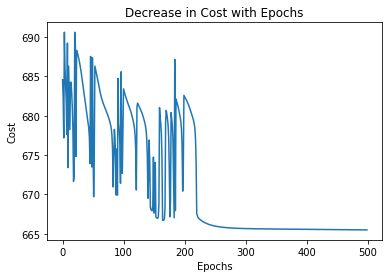

In [42]:
plt.plot(list(range(epochs)), cost_history) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('Decrease in Cost with Epochs') 
  
plt.show() 

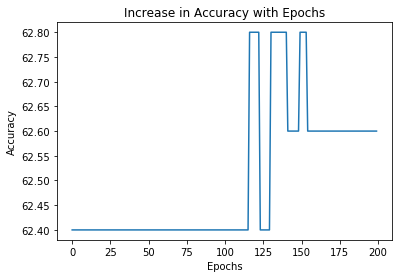

In [56]:
plt.plot(list(range(epochs)), accuracy_history) 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.title('Increase in Accuracy with Epochs') 
  
plt.show() 

In [107]:
logmodel.coef_

array([[4.41165804e-17, 2.64692822e-18, 2.75498879e-17, 4.30648166e-19,
        2.75258212e-17, 1.91588307e-18, 9.63827604e-17, 6.57749367e-18,
        4.08574039e-17, 2.55405719e-18, 2.64788458e-17, 6.37478281e-19,
        2.59212164e-17, 1.81071655e-18, 1.09826816e-17, 2.58012967e-17,
        3.02082694e-10]])

In [126]:
print( weighted_rating )
print( np.sort( weighted_rating ) )
print( np.argsort( weighted_rating ) )
print( weighted_rating[np.argsort( weighted_rating )]  )

[1.1811679914974647, 1.0740001771361507, 1.0181697764917181, 1.0857077820815941, 1.1262689838388313]
[1.01816978 1.07400018 1.08570778 1.12626898 1.18116799]
[2 1 3 4 0]


TypeError: only integer scalar arrays can be converted to a scalar index

In [116]:
len(date_vec)
#days = date_vec.values.astype('timedelta64[D]')
#days
print(map_date)
#df_aux
m = float(1.0)/ sum( date_vec[(date_vec>1) & (date_vec<DAYS_WEIGHT)]-DAYS_WEIGHT )
w_i = m * (date_vec[(date_vec>1) & (date_vec<DAYS_WEIGHT)] - DAYS_WEIGHT)
#print(w_i)
df_aux.head()


print(sum(df_aux['rating'] * w_i))

df_aux['rating'].tail(n=1000).mean()
#sum(w_i)

2020-01-10 00:35:00
1.215422684947577


1.2496026490066228

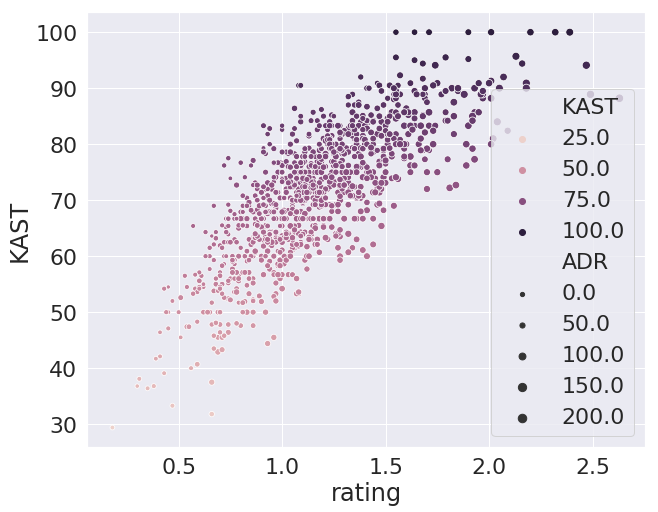

In [15]:
sns.set_style("whitegrid")
sns.set(font_scale=2)

plt.figure(figsize=(10,8));

sns.scatterplot(data=dict_player[8797],x='rating',y='KAST',size='ADR',hue='KAST');
#plt.title('Data from 2019');
#plt.xlabel('Win Percentage');
#plt.ylabel('Average Team Damage per Round');

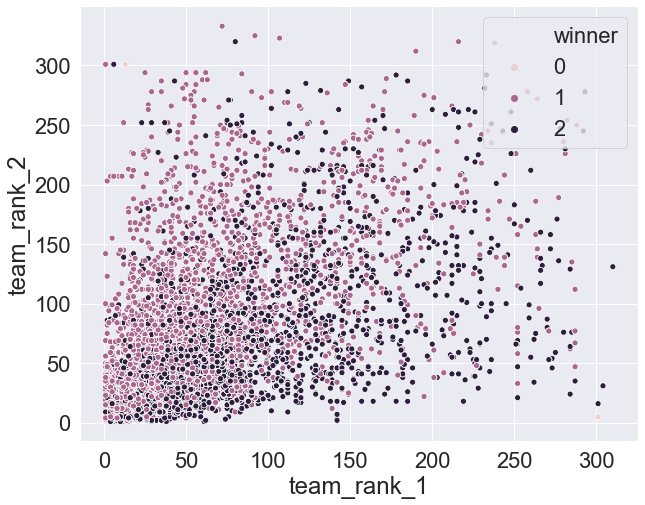

In [299]:
sns.set_style("whitegrid")
sns.set(font_scale=2)

plt.figure(figsize=(10,8));

sns.scatterplot(data=df_map[(df_map['date']>datetime(2019,1,1)) & (df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) ],x='team_rank_1',y='team_rank_2',hue='winner');

In [297]:
df_map.tail()

,map_id,map,date,event_id,event_name,team_id_1,team_name_1,team_score_1,team_kills_1,team_deaths_1,team_assists_1,team_rank_1,team_id_2,team_name_2,team_score_2,team_kills_2,team_deaths_2,team_assists_2,team_rank_2,winner
97591,97591,trn,2020-01-10 00:35:00,5104,IEM Katowice 2020 North America Closed Qualifier,5752,Cloud9,13,90.0,105.0,12.0,18,9215,MIBR,16,105.0,90.0,20.0,14,2
97592,97592,nuke,2020-01-10 01:00:00,5164,Aorus League 2019 #4 Northern Cone,10330,Supremacy,16,98.0,69.0,17.0,0,10578,Infamous,8,69.0,98.0,13.0,0,1
97593,97593,ovp,2020-01-10 00:35:00,5104,IEM Katowice 2020 North America Closed Qualifier,5752,Cloud9,16,77.0,46.0,11.0,18,9215,MIBR,4,46.0,77.0,10.0,14,1
97594,97594,inf,2020-01-10 01:00:00,5164,Aorus League 2019 #4 Northern Cone,10330,Supremacy,16,99.0,93.0,16.0,0,10578,Infamous,12,93.0,100.0,17.0,0,1
97595,97595,inf,2020-01-10 00:35:00,5104,IEM Katowice 2020 North America Closed Qualifier,5752,Cloud9,16,100.0,91.0,14.0,18,9215,MIBR,12,90.0,100.0,16.0,14,1
